**MIST를 통한 딥러닝 실습**

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Image shape: (28, 28, 1)
Image Label Array: 4 Image label shape: () 
Image Label: 0


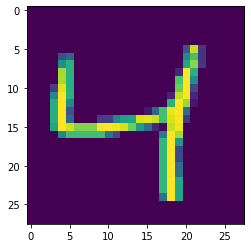

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

img_id = 2
print('Image shape:', x_train[img_id].shape)
print('Image Label Array:', y_train[img_id],
      'Image label shape:', y_train[img_id].shape,
      '\nImage Label:', np.argmax(y_train[img_id]))

plt.imshow(x_train[img_id].reshape(28,28), interpolation='nearest')
plt.show()

In [ ]:
input_shape = (28, 28, 1)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
     keras.Input(shape=input_shape),
     layers.Conv2D(32, kernel_size=(3, 3), activation = 'relu'),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Conv2D(64, kernel_size=(3, 3), activation = 'relu'),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(num_classes, activation='softmax'),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [ ]:
batch_size = 128 # batch size
epochs = 1 # the number of training

# training
model.compile(loss="categorical_crossentropy",
              optimizer = "adam",
              metrics=["accuracy"])

# 여기서 validation_split 값이란 training을 진행하면서 테스트를 같이 진행하기 위해 training data의 일부(여기서는 0.1, 즉 전체 데이터의 10%로 설정하였다.)를 분할해놓는 데이터이다.
# The validation_split value is a data obtained by dividing a part of the training data(here, set to 0.1, that is, 10% of the total data) to proceed with the test while training.

history = model.fit(x_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)


422/422 [==============================] - 43s 101ms/step - loss: 0.3685 - accuracy: 0.8886 - val_loss: 0.0837 - val_accuracy: 0.9778


Image shape: (28, 28, 1)
True Image Label Array: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
True Image Label Shape: (10,) 
True Image Label: 0


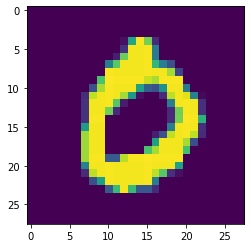

Predicted Image Label Array: ['1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'] 
Predicted Image Label Shape: (1, 10) 
Predicted Image Label: 0


In [ ]:
img_id = 3

sample_test_image = x_test[img_id]
sample_test_label = y_test[img_id]

print('Image shape:', sample_test_image.shape)
print('True Image Label Array:', sample_test_label,
      '\nTrue Image Label Shape:', sample_test_label.shape,
      '\nTrue Image Label:', np.argmax(sample_test_label))
plt.imshow(sample_test_image.reshape(28,28), interpolation='nearest')
plt.show()

prediction = model.predict(sample_test_image.reshape(1,28,28,1))

print('Predicted Image Label Array:',['{0:0.3f}'.format(i) for i in prediction[0]],
      '\nPredicted Image Label Shape:', prediction.shape,
      '\nPredicted Image Label:', np.argmax(prediction))
